In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px 
import numpy as np
import matplotlib as mb

In [3]:
df=pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Ckek for Missing Values

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Descriptive Statistics

In [15]:
# Get summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
# Check unique values for categorical columns
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


## Data Visualization

### Distribution of Numerical Variables

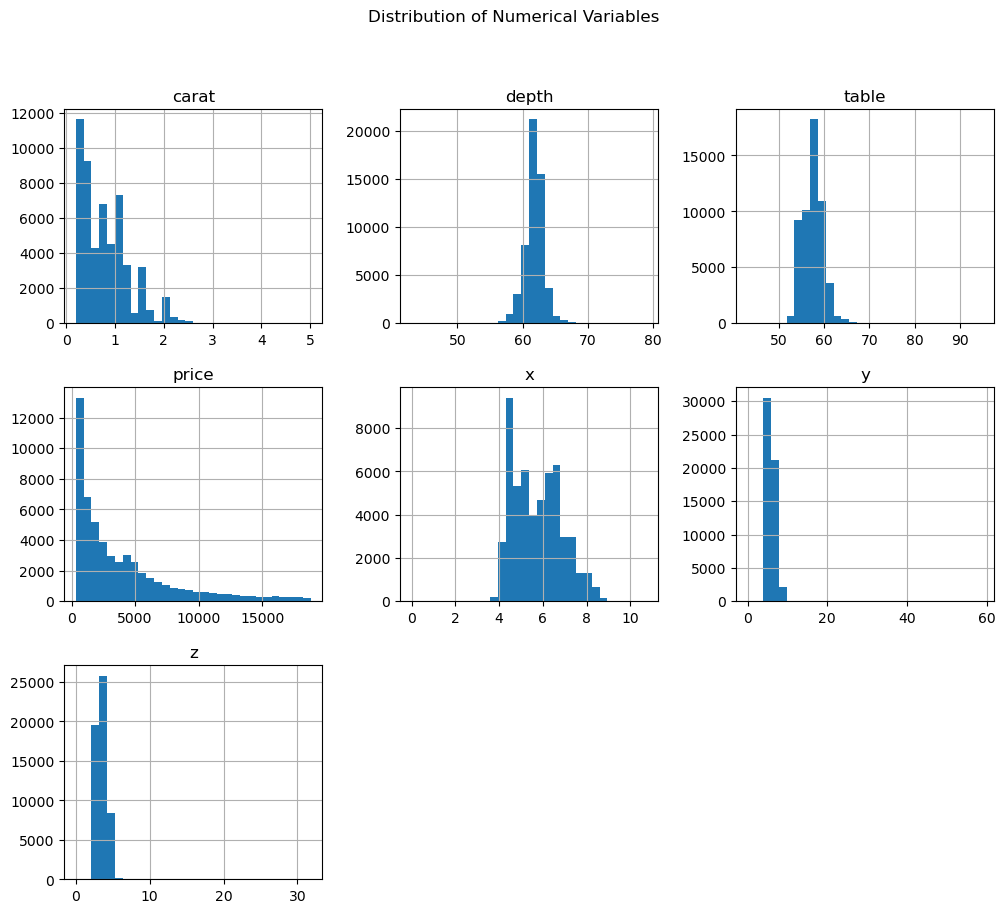

In [21]:
# Plot histograms for numerical variables
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Variables')
plt.show()

### Distribution of Categorical Variables

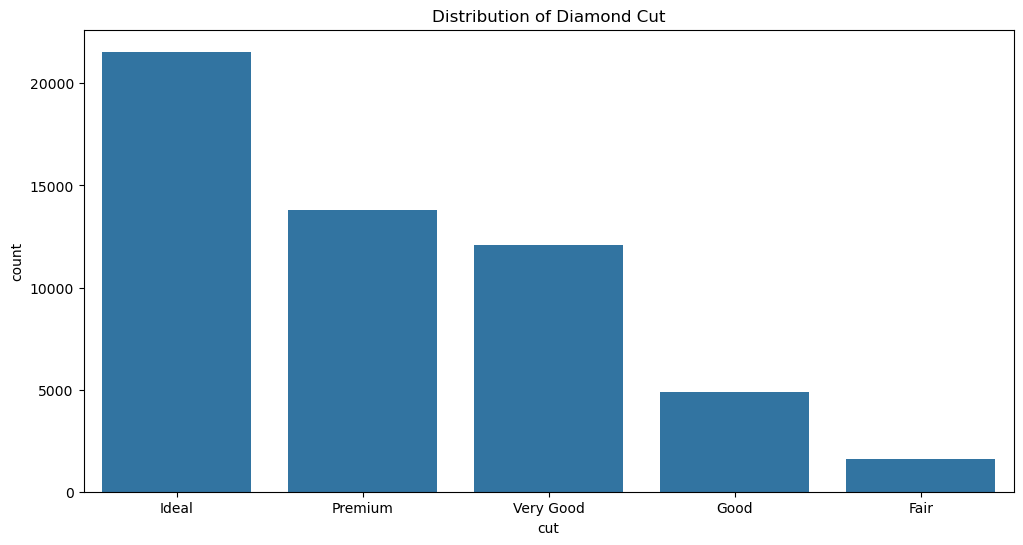

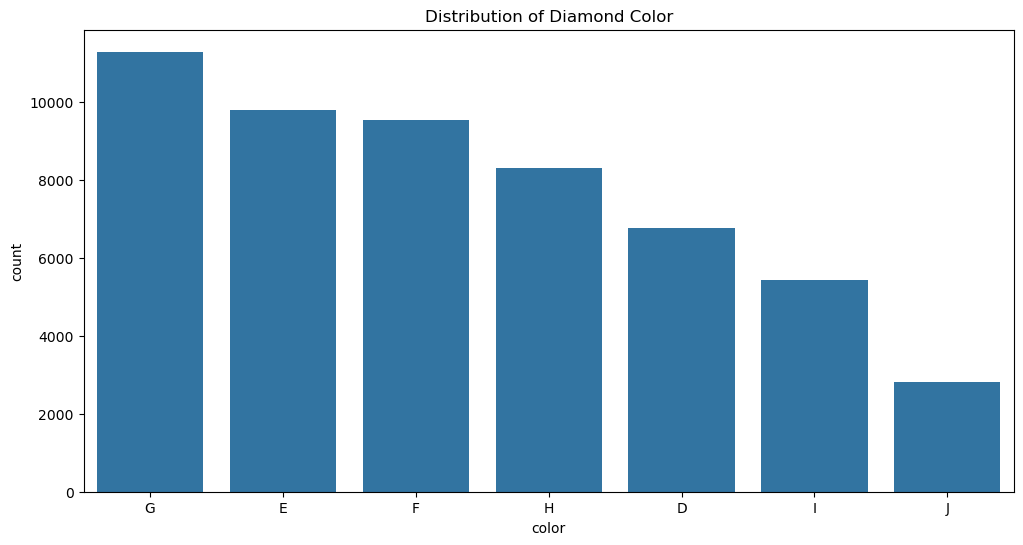

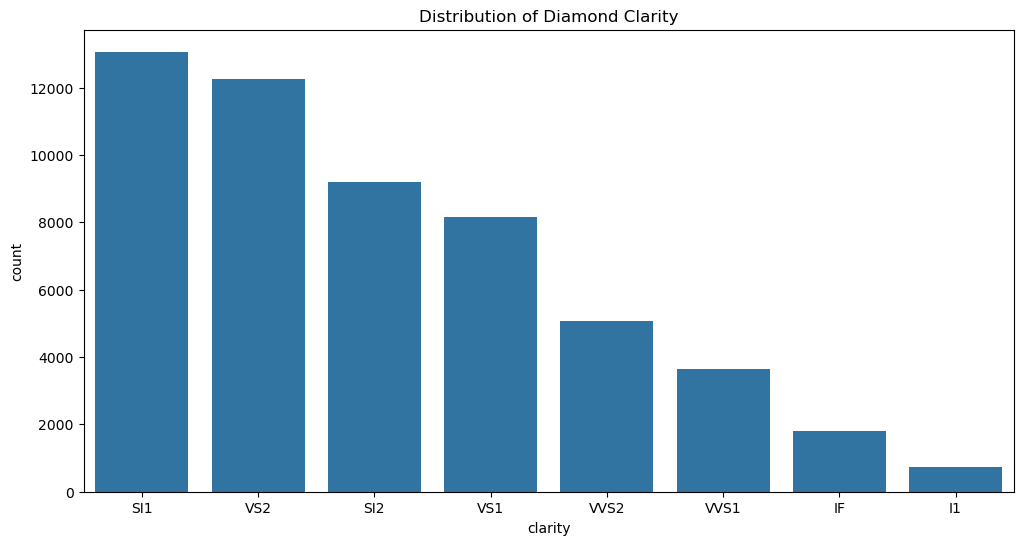

In [24]:
# Plot count plots for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='cut', data=df, order=df['cut'].value_counts().index)
plt.title('Distribution of Diamond Cut')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='color', data=df, order=df['color'].value_counts().index)
plt.title('Distribution of Diamond Color')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='clarity', data=df, order=df['clarity'].value_counts().index)
plt.title('Distribution of Diamond Clarity')
plt.show()

### Relationship Between Carat and Price

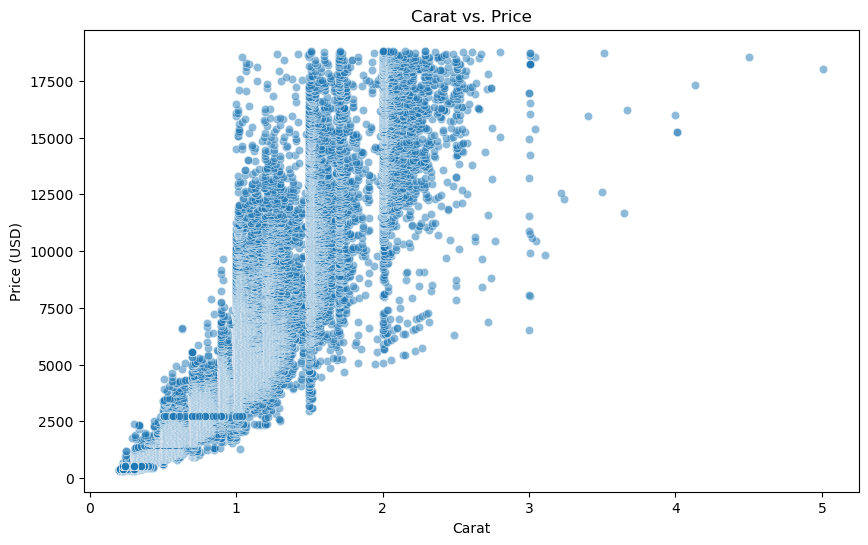

In [27]:
# Scatter plot of carat vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()

### Correlation Heatmap

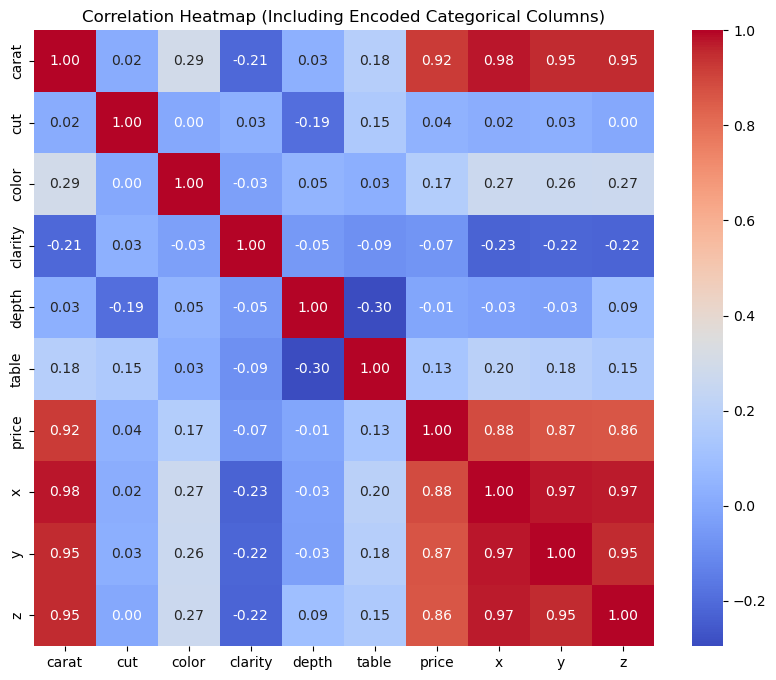

In [42]:
# Encode categorical columns
df_encoded = df.copy()
df_encoded['cut'] = df_encoded['cut'].astype('category').cat.codes
df_encoded['color'] = df_encoded['color'].astype('category').cat.codes
df_encoded['clarity'] = df_encoded['clarity'].astype('category').cat.codes

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including Encoded Categorical Columns)')
plt.show()

## *Conclusion*
- Summarize the key findings from your EDA and visualizations.
- For example:
- "The price of diamonds increases with carat size, but the relationship is not perfectly linear."
- "Ideal cut diamonds are the most common in the dataset, but Premium cut diamonds tend to have higher prices."
- "There is a strong positive correlation between the dimensions (x, y, z) and the carat size."